In [40]:
from google.colab import drive
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import numpy as np
import os
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile,os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/pa/coins/data'

In [49]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [51]:
print("|===========================================|")
print("|            JUMLAH SELURUH FILE            |")
print("|===========================================|")
Trainset = "/content/drive/MyDrive/Colab Notebooks/pa/coins/data"
training_gen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 40,
          width_shift_range = 0.2,
          height_shift_range = 0.2,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          fill_mode = 'wrap',
          validation_split = 0.4
      ) 
trainset_gen = training_gen.flow_from_directory(
    Trainset,
    target_size = (150,150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)
valid_gen = training_gen.flow_from_directory(
    Trainset,
    target_size = (150,150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
  )

|===========================================|
|            JUMLAH SELURUH FILE            |
|===========================================|
Found 2470 images belonging to 3 classes.
Found 1645 images belonging to 3 classes.


In [53]:
print("|===========================================|")
print("\n")
print("+----------------------------------------------------------------+")
print("+                           MODEL SEQUENTIAL                     +")
print("+----------------------------------------------------------------+")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

|===========================================|


+----------------------------------------------------------------+
+                           MODEL SEQUENTIAL                     +
+----------------------------------------------------------------+
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
   

+----------------------------------------------------------------+


+--------------------------------------------------------------------------------------------------------------+
+                                                 WAKTU AKURASI                                                +
+--------------------------------------------------------------------------------------------------------------+
Epoch 1/15
25/25 - 268s - loss: 0.5881 - accuracy: 0.7900 - val_loss: 0.5248 - val_accuracy: 0.8333 - 268s/epoch - 11s/step
Epoch 2/15
25/25 - 199s - loss: 0.5489 - accuracy: 0.7763 - val_loss: 0.5292 - val_accuracy: 0.7812 - 199s/epoch - 8s/step
Epoch 3/15
25/25 - 138s - loss: 0.5340 - accuracy: 0.7987 - val_loss: 0.5383 - val_accuracy: 0.7760 - 138s/epoch - 6s/step
Epoch 4/15
25/25 - 105s - loss: 0.5143 - accuracy: 0.7950 - val_loss: 0.5424 - val_accuracy: 0.7708 - 105s/epoch - 4s/step
Epoch 5/15
25/25 - 120s - loss: 0.5056 - accuracy: 0.8037 - val_loss: 0.5197 - val_accuracy: 0.8229

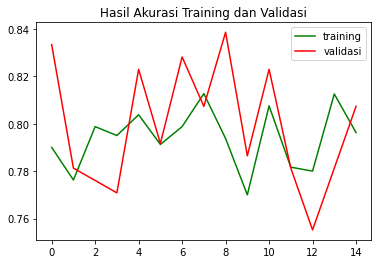

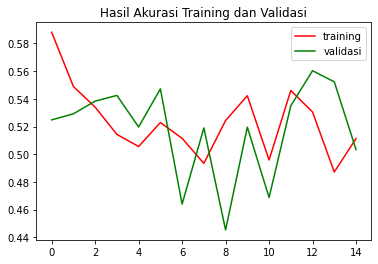

In [54]:
print("+----------------------------------------------------------------+")
print("\n")
print("+--------------------------------------------------------------------------------------------------------------+")
print("+                                                 WAKTU AKURASI                                                +")
print("+--------------------------------------------------------------------------------------------------------------+")

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
history=model.fit(
    trainset_gen,                                                              
    steps_per_epoch=25,                                                      
    epochs=15,                                                              
    validation_data=valid_gen,                                         
    validation_steps=6,                                                
    verbose=2
    )
print("+--------------------------------------------------------------------------------------------------------------+")
print("\n")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='training')
plt.plot(epochs, val_acc, 'r', label='validasi')
plt.title('Hasil Akurasi Training dan Validasi')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='training')
plt.plot(epochs, val_loss, 'g', label='validasi')
plt.title('Hasil Akurasi Training dan Validasi')
plt.legend(loc='best')
plt.show()
